### Alexandre Francony

# PW3-Supervised Machine Learning : A basic supervised Learning algorithms
## 1 Summary

In this lesson, we focus on supervised learning problems: the aim is to develop algorithms able to learn predictive
models. Based on labeled examples, these models will be able to predict the label of new objects. The aim of this
PW is to develop the general concepts with Scikit-learn allowing us to formalize this category of problem. Here
a definition of supervised learning concept:
Definition: Supervised learning is a machine learning technique where an algorithm learns from labeled data to make
predictions or decisions. It is widely applied in various domains, such as classifying emails as spam or non-
spam, predicting housing prices based on different factors, or detecting anomalies in datasets. Scikit-learn, a
popular Python library, provides a comprehensive set of tools and algorithms for supervised learning tasks.
Our Objectives are

• Formalize a problem as a supervised learning problem;

• select an appropriate cost function;

• Look for its generalization

### Problem statement and notation

Supervised learning problem can be formalized as follows: given n observations {x1,x2,...xn}, where each
observation xiis an element of the space of observations X , and their labels {y1,y2,...yn}, where each label yi
belongs to the label space Y. The aim of supervised learning is to find a function f : X →Y such that f(x) ≈y,
for all pairs (x,y) ∈X ×Y having the same relationship as the observed pairs. The set of D = (xi,yi)i = 1,...,n
forms the training set. In this lesson, we will consider three special cases for Y :

• Y = R: we deal with a regression problem;

• Y = {0,1}: this is called a binary 

classification problem, and observations whose label 0 are called negative,
while those with a label of 1 are called positive. In some cases, it is mathematically useful to use Y =
{−1,1};

• Y = {1,2,...C},C > 2: this is known as a multi-class classification problem.

In many situations, we assume we have X = Rp where the observations are represented by p variables. In this
case, the matrix X ∈Rn×p such that Xij = xij is the jth variable of the ith observation is called the data matrix.

### Decision
n the case of a classification problem, the predictive model can take the form of a function f with values in {0,1},
or use a real-valued intermediate function g, which associates a higher score to observations. This score is, for
example the probability that the observation belongs to the positive class. We then obtain f by thresholding g ; g
is called the decision function.
(Decision function) In a binary classification problem, a decision function g, or a discriminant function g : X →
Rsuch that f(x) = 0 if and only if g(x) ≤0 and f(x) = 1 if and only if g(x) > 0.
(Decision Space) In the case of binary classification, the function g split the observation space X into two decision
Areas A0 and A1 such that:
A0 = {x ∈X|g(x) ≤0}and A1 = {xinX|g(x) > 0}

### Cost Function

Solving a supervised learning problem means finding a function f ∈F whose predictions are as close as possible
to the true labels, over the whole space X . It is a Minimizing empirical risk. To formalize this, we use the notion
of cost function.
(Cost function) A cost function L : Y ×Y →R, also called loss function or error function, is a function used to
quantify the quality of a prediction: L(y,f(x)) is greater the closer the label f(x) is to the true value y.

## 2 Exercises

### Exercise 1 : Scale the data

You will need the dataset Wine quality, with Quality column has two classes good and bad. We should classify
any a given wine into two classes based on the following features:

In [227]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

1. Read the Dataset, store the data into a variable ’wine data’ and print the basic information and statistics.
The date could be found online from this URL: Red-Wine

In [228]:
# Read the dataset from the URL
wine_data = pd.read_csv('data/winequality-white.csv', delimiter=';')

# Print basic information and statistics
print(wine_data.info())
print(wine_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.00000

2. transform the wine data into a dataframe using pandas.DataFrame. function and as parameters wine data.values,
wine data.columns


In [229]:
wine_df = pd.DataFrame(wine_data.values, columns=wine_data.columns)
print(wine_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8      6.0  
1      9.5      6.0  
2     10.1      6.0 

3. check if there are missing values


In [230]:
# Check for missing values
missing_values = wine_df.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


4. Drop the quality column to set the rest of the data into a variable X using the function drop(data,axis)

In [231]:
X = wine_df.drop('quality', axis=1)
print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  


5. copy the column ’quality’ into a new variable Y

In [232]:
Y = wine_df['quality'].copy()
print(Y.head())

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: quality, dtype: float64


6. As you can see, the numeric data are with different scales and to avoid misinterpretation of ML results,
we want to bring all features to a common scale. Many techniques exist. we commonly use two main
techniques: standardization and normalization

In [233]:
# Standardization
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

# Normalization
scaler_normal = MinMaxScaler()
X_normalized = scaler_normal.fit_transform(X)

print("Standardized Data:\n", X_standardized[:5])
print("Normalized Data:\n", X_normalized[:5])

Standardized Data:
 [[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01  2.82134917e+00
  -3.53550004e-02  5.69931577e-01  7.44565035e-01  2.33151201e+00
  -1.24692128e+00 -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 -9.44765273e-01
   1.47747079e-01 -1.25301866e+00 -1.49684624e-01 -9.15417164e-03
   7.40028640e-01  1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01  1.00282190e-01
   1.93522599e-01 -3.12141119e-01 -9.73335626e-01  3.58664800e-01
   4.75101984e-01 -4.36815783e-01 -3.36667007e-01]
 [ 4.09124986e-01 -4.78657278e-01 -1.17277959e-01  4.15768217e-01
   5.59726758e-01  6.87541270e-01  1.12109121e+00  5.25855242e-01
   1.14803354e-02 -7.87341887e-01 -4.99203231e-01]
 [ 4.09124986e-01 -4.78657278e-01 -1.17277959e-01  4.15768217e-01
   5.59726758e-01  6.87541270e-01  1.12109121e+00  5.25855242e-01
   1.14803354e-02 -7.87341887e-01 -4.99203231e-01]]
Normalized Data:
 [[0.30769231 0.18627451 0.21686747 0.30828221 

7. Create the training and test datasets : x train, x test, y train, y test with 30% for test and random state=20.
What is the role of random state?


In [234]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

Training set size: (3428, 11)
Test set size: (1470, 11)


8. Use the correct scale and apply it to the train and test data set.


In [235]:
# Apply standardization to the train and test datasets
x_train_standardized = scaler_standard.transform(x_train)
x_test_standardized = scaler_standard.transform(x_test)

# Apply normalization to the train and test datasets
x_train_normalized = scaler_normal.transform(x_train)
x_test_normalized = scaler_normal.transform(x_test)

print("Standardized Training Data:\n", x_train_standardized[:5])
print("Standardized Test Data:\n", x_test_standardized[:5])
print("Normalized Training Data:\n", x_train_normalized[:5])
print("Normalized Test Data:\n", x_test_normalized[:5])

Standardized Training Data:
 [[-5.38987115e-01 -1.07398834e+00  4.80011213e-02 -9.64483150e-01
   2.07031891e+00  3.93517038e-01 -7.90859669e-02 -7.60303484e-02
   4.08870320e-01  1.34184656e-03 -7.43007566e-01]
 [ 2.30534919e+00  5.13561164e-01  8.74396524e-01 -8.16613165e-03
  -9.96640918e-01 -1.54704289e+00 -1.20866448e+00 -7.78230204e-01
  -1.51184794e+00 -7.87341887e-01  1.69503579e+00]
 [-1.60561323e+00 -8.75544654e-01 -5.30475661e-01 -1.08279041e+00
  -2.64232600e-01  9.81565502e-01 -8.32138311e-01 -1.25973868e+00
   2.06466192e+00 -8.74973413e-01  5.57282222e-01]
 [-7.76015140e-01 -8.17699008e-02 -1.17277959e-01 -1.80250700e-02
   1.01971559e-01  6.87541270e-01  4.85703291e-01 -4.03723614e-01
   1.43943663e-01  9.65288632e-01  3.94745998e-01]
 [-6.49310643e-02 -2.80213589e-01 -5.30475661e-01  8.49561503e-01
   1.38368612e+00  6.87541270e-01  3.68038862e-01  8.93674214e-01
  -9.15762961e-01 -9.62604939e-01 -1.23061624e+00]]
Standardized Test Data:
 [[-0.18344508  0.01745194  0.0

9. Formalize the problem as a linear regression model and implement it using the appropriate function.


In [236]:
# Initialize the linear regression model
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(x_train_standardized, y_train)

# Print the coefficients and intercept
print("Coefficients:", linear_regressor.coef_)
print("Intercept:", linear_regressor.intercept_)

Coefficients: [ 3.31145230e-02 -1.82038106e-01 -2.66556160e-05  3.83416602e-01
 -9.91113036e-03  8.96198145e-02 -3.01463831e-02 -3.85013522e-01
  9.34259732e-02  5.59975192e-02  2.57031038e-01]
Intercept: 5.879896150244012


10. with scikit learn, use LinearRegression() class after the import as following : from sklearn.linear model
import LinearRegression


In [237]:
# Fit the model to the standardized training data
linear_regressor.fit(x_train_standardized, y_train)

# Predict on the standardized test data
y_pred = linear_regressor.predict(x_test_standardized)

# Print the first few predictions
print("Predictions:", y_pred[:5])

Predictions: [6.15825113 5.92896534 6.19147158 5.7346342  5.86348472]


11. fit your model


In [238]:
# Fit the model to the standardized training data
linear_regressor.fit(x_train_standardized, y_train)

# Print the coefficients and intercept
print("Coefficients:", linear_regressor.coef_)
print("Intercept:", linear_regressor.intercept_)

Coefficients: [ 3.31145230e-02 -1.82038106e-01 -2.66556160e-05  3.83416602e-01
 -9.91113036e-03  8.96198145e-02 -3.01463831e-02 -3.85013522e-01
  9.34259732e-02  5.59975192e-02  2.57031038e-01]
Intercept: 5.879896150244012


12. predict on your test dataset


In [239]:
# Predict on the standardized test data
y_pred = linear_regressor.predict(x_test_standardized)

# Print the first few predictions
print("Predictions:", y_pred[:5])

Predictions: [6.15825113 5.92896534 6.19147158 5.7346342  5.86348472]


13. calculate the mean square error on the test dataset using : from sklearn.metrics import mean squared error,
r2 score

In [240]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.6028229341410911
R-squared: 0.26788524013845805


### Exercise 2 : Prediction pipeline and evaluation

We can remark, the lack of the linear model to predict the right quality based on the input features : Mean Squared
Error mse: 0.6215899256984494 is very high and the R-squared R2: 0.25761478584858577 is low. With a
prediction based on a linear regression model, we needed two parameters to evaluate the model performance. However to evaluate the goodness of fit of a regression model we need the (R2).
We would compare the same prediction by changing different parameters as: random state, the transformer,
etc. To do this in a right way, we have to implement pipelines.

1. write a python function named LR Pipeline with the signature

In [241]:
def LR_Pipeline(scaler):
    # Create a pipeline with the scaler and linear regression model
    my_pipeline = Pipeline([
        ('scaler', scaler),
        ('regressor', LinearRegression())
    ])
    return my_pipeline

allowing you to create your pipeline with the following steps : 1) scale data, 2) predict. Your function need
the scaler as a parameter to be able to call MinMaxScaler() as standardScaler()

2. call your function with the standardscaler and compare the results with a random-state equal to 20. Com-
ment your results!

3. Plot the quality prediction VS. the real quality in the case of the best configuration of your predictor model.

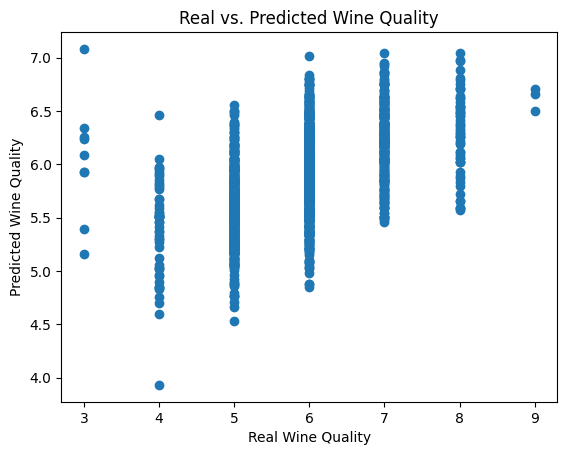

In [242]:
# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Real Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Real vs. Predicted Wine Quality")
plt.show()

4. If we note Θ = (θ1,..,θ11) and B the estimated parameters of our predictor model, try to display them from
your pipeline and write the exact formula of your predictor.

In [243]:
# Access the coefficients (Θ)
coefficients = linear_regressor.coef_

# Access the intercept (B)
intercept = linear_regressor.intercept_

print("Coefficients (Θ):", coefficients)
print("Intercept (B):", intercept)

Coefficients (Θ): [ 3.31145230e-02 -1.82038106e-01 -2.66556160e-05  3.83416602e-01
 -9.91113036e-03  8.96198145e-02 -3.01463831e-02 -3.85013522e-01
  9.34259732e-02  5.59975192e-02  2.57031038e-01]
Intercept (B): 5.879896150244012


5. Fit and predict the wine quality with the same model after normalizing the target feature Y . Compare the
following resultas without the normalization of Y . What are your comments.

In [244]:
# Normalize the target feature Y
scaler_y = MinMaxScaler()
Y_normalized = scaler_y.fit_transform(Y.values.reshape(-1, 1))

# Split the data into training and test sets
x_train, x_test, y_train_normalized, y_test_normalized = train_test_split(X, Y_normalized, test_size=0.3, random_state=20)

# Apply standardization to the train and test datasets
x_train_standardized = scaler_standard.transform(x_train)
x_test_standardized = scaler_standard.transform(x_test)

# Initialize the linear regression model
linear_regressor_normalized = LinearRegression()

# Fit the model to the standardized training data with normalized target
linear_regressor_normalized.fit(x_train_standardized, y_train_normalized)

# Predict on the standardized test data
y_pred_normalized = linear_regressor_normalized.predict(x_test_standardized)

# Inverse transform the predictions to get them back to the original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred_normalized)

# Print the first few predictions
print("Predictions (original scale):", y_pred_original_scale[:5].flatten())

# Calculate the mean squared error
mse_normalized = mean_squared_error(y_test, y_pred_original_scale)
print("Mean Squared Error (with normalized Y):", mse_normalized)

# Calculate the R-squared score
r2_normalized = r2_score(y_test, y_pred_original_scale)
print("R-squared (with normalized Y):", r2_normalized)

Predictions (original scale): [6.15825113 5.92896534 6.19147158 5.7346342  5.86348472]
Mean Squared Error (with normalized Y): 0.602822934141091
R-squared (with normalized Y): 0.26788524013845816


### Exercise 3: Logistic regression
We try to explain our wine quality prediction to a classification problem aiming to distinguish between good and
bad wines. Let suppose we have two binary classes defined as follow: if the wine quality is greater than 5, the
label will be 1 and 0 else.

1. transform the target output feature y to be {0,1}

In [245]:
# Transform the target output feature y to be binary {0, 1}
Y_binary = (wine_df['quality'] > 5).astype(int)
print(Y_binary.head())

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int32


2. define an other function for your pipeline taking as parameters the scaler and the predictor model.

In [246]:
def Reg_Pipeline(scaler, model):
    # Create a pipeline with the scaler and the provided model
    my_pipeline = Pipeline([
        ('scaler', scaler),
        ('regressor', model)
    ])
    return my_pipeline

3. Fit and predict your pipeline with a standardscaler and LogisticRegression model.

In [247]:
# Create the pipeline with StandardScaler and LogisticRegression
pipeline = Reg_Pipeline(StandardScaler(), LogisticRegression())

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y_binary, test_size=0.3, random_state=20)

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict on the test data
pred = pipeline.predict(x_test)

# Print the first few predictions
print("Predictions:", pred[:5])

Predictions: [1 1 1 1 1]


4. Now we try to evaluate the classification performance.

In [248]:
accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
classification_rep = classification_report(y_test, pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7489795918367347
Confusion Matrix:
 [[245 254]
 [115 856]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.49      0.57       499
           1       0.77      0.88      0.82       971

    accuracy                           0.75      1470
   macro avg       0.73      0.69      0.70      1470
weighted avg       0.74      0.75      0.74      1470



5. Check the imbalaced datasets problem by comparing the rate of trained 0 samples VS. 1 samples.

In [249]:
# Count the number of samples in each class in the training dataset
class_counts = y_train.value_counts()
print("Class 0 samples:", class_counts[0])
print("Class 1 samples:", class_counts[1])

# Calculate the rate of each class
class_0_rate = class_counts[0] / len(y_train)
class_1_rate = class_counts[1] / len(y_train)
print("Class 0 rate:", class_0_rate)
print("Class 1 rate:", class_1_rate)

Class 0 samples: 1141
Class 1 samples: 2287
Class 0 rate: 0.33284714119019837
Class 1 rate: 0.6671528588098017


### Exercise 4: Naive Bayes classification

In this exercise, we are looking for the improvement of Na ̈ıve Bayes to classify the wine quality. Naive Bayes is
a simple algorithm aiming to estimate the probabilistic of a random event using the following concepts.

1. Import the adequate class from Scikit learn to use the Naive Bayes, with a Gaussian distribution Gaus-
sianNB.


In [250]:
from sklearn.naive_bayes import GaussianNB

2. Use your pipeline with this new model.


In [251]:
# Create the pipeline with StandardScaler and GaussianNB
pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Fit the pipeline to the training data
pipeline_nb.fit(x_train, y_train)

# Predict on the test data
pred_nb = pipeline_nb.predict(x_test)

# Print the first few predictions
print("Predictions:", pred_nb[:5])

Predictions: [1 0 1 1 1]


3. Fit the model to the training set


In [252]:
# Fit the pipeline to the training data
pipeline_nb.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('nb', GaussianNB())])

4. Predict the classes of your test dataset


In [253]:
# Predict the classes of the test dataset
pred_nb = pipeline_nb.predict(x_test)

# Print the first few predictions
print("Predictions:", pred_nb[:5])

Predictions: [1 0 1 1 1]


5. calculate the confusion matrix, the precision, recall, F-score and accuracy.


In [254]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_nb)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, F-score, and accuracy
precision = precision_score(y_test, pred_nb)
recall = recall_score(y_test, pred_nb)
f1 = f1_score(y_test, pred_nb)
accuracy = accuracy_score(y_test, pred_nb)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[293 206]
 [210 761]]
Precision: 0.7869700103412617
Recall: 0.7837281153450052
F1 Score: 0.7853457172342622
Accuracy: 0.7170068027210884


6. What is your conclusion?

### Exercise 5: performance comparison between different models

We used three different models to predict wine quality. First, linear regression is used to predict the quality value,
not the label. Secondly, two similar models, logistic regression and naive Bayes, are used to predict binary classes
of wine quality. We therefore need to decide which model might be appropriate for our problem in the event that
these models are comparable.

1. How we can compare Naive Bayes and Logistic Regression

Logistic Regression Metrics:
Accuracy: 0.7489795918367347
Precision: 0.7711711711711712
Recall: 0.8815653964984552
F1 Score: 0.8226814031715521
ROC AUC: 0.6862736802131555

Naive Bayes Metrics:
Accuracy: 0.7170068027210884
Precision: 0.7869700103412617
Recall: 0.7837281153450052
F1 Score: 0.7853457172342622
ROC AUC: 0.6854512320212001


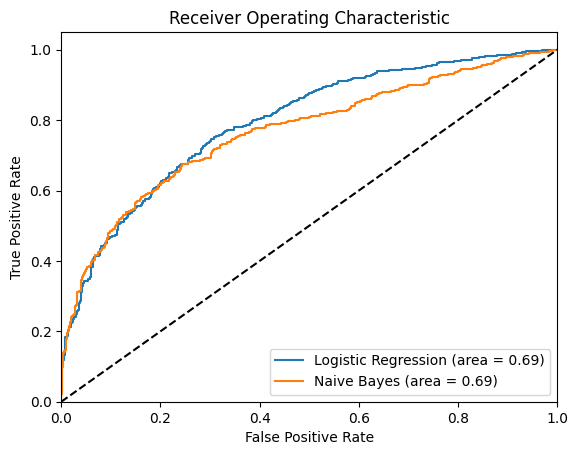

In [255]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, pred)
precision_lr = precision_score(y_test, pred)
recall_lr = recall_score(y_test, pred)
f1_lr = f1_score(y_test, pred)
roc_auc_lr = roc_auc_score(y_test, pred)

# Calculate metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, pred_nb)
precision_nb = precision_score(y_test, pred_nb)
recall_nb = recall_score(y_test, pred_nb)
f1_nb = f1_score(y_test, pred_nb)
roc_auc_nb = roc_auc_score(y_test, pred_nb)

# Print the comparison
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("ROC AUC:", roc_auc_lr)

print("\nNaive Bayes Metrics:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("ROC AUC:", roc_auc_nb)

# Plot ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, pipeline.predict_proba(x_test)[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, pipeline_nb.predict_proba(x_test)[:, 1])

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

2. use the AUC-ROC to decide which model might be validated to this classification problem.

In [256]:
# Calculate AUC-ROC for Logistic Regression
roc_auc_lr = roc_auc_score(y_test, pipeline.predict_proba(x_test)[:, 1])

# Calculate AUC-ROC for Naive Bayes
roc_auc_nb = roc_auc_score(y_test, pipeline_nb.predict_proba(x_test)[:, 1])

# Print the AUC-ROC scores
print("Logistic Regression AUC-ROC:", roc_auc_lr)
print("Naive Bayes AUC-ROC:", roc_auc_nb)

# Determine which model has the higher AUC-ROC score
if roc_auc_lr > roc_auc_nb:
    print("Logistic Regression has a better AUC-ROC score and might be validated for this classification problem.")
else:
    print("Naive Bayes has a better AUC-ROC score and might be validated for this classification problem.")

Logistic Regression AUC-ROC: 0.7927471833471268
Naive Bayes AUC-ROC: 0.7659128762158716
Logistic Regression has a better AUC-ROC score and might be validated for this classification problem.
